# Telco Customer Churn
##### Focused customer retention programs to see if we can predict if a user  will churn

# Preprocessing of data
- Import necessary packages required
- Read the required CSV
- how the head of the csv Dataframe
- Look at the info of the Dataframe 
- Look to see if there are ny null values
- Replace the space input on the Total Charges and change the dtype
- LabelEncode all the categorical data 
- Create new Dataframe with dropped old columns and new columns 
- Split the data into x(the features ) and y(the dependent) 
- Split the data into training and test sets
- See the statistics of the dataset

In [1]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report 
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 

from pydot import graph_from_dot_data

import pydotplus

import graphviz
# from sklearn.datasets import load_wine
from IPython.display import SVG
from graphviz import Source
from IPython.display import Image 
# from IPython.display import display

/home/recruit/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


##### Read the CSV for processing 

In [2]:
data = pd.read_csv('CSV/WA_Fn-UseC_-Telco-Customer-Churn.csv')

#### Columns in CSV
- customerID Customer ID
- gender Whether the customer is a male or a female
- SeniorCitizen Whether the customer is a senior citizen or not (1, 0)
- Partner Whether the customer has a partner or not (Yes, No)
- Dependents Whether the customer has dependents or not (Yes, No)
- tenure Number of months the customer has stayed with the company
- PhoneService Whether the customer has a phone service or not (Yes, No)
- MultipleLines Whether the customer has multiple lines or not (Yes, No, No phone service)
- InternetService Customer’s internet service provider (DSL, Fiber optic, No)
- OnlineSecurity Whether the customer has online security or not (Yes, No, No internet service)
- OnlineBackup Whether the customer has online backup or not (Yes, No, No internet service)
- DeviceProtection Whether the customer has device protection or not (Yes, No, No internet service)
- TechSupport Whether the customer has tech support or not (Yes, No, No internet service)
- StreamingTV Whether the customer has streaming TV or not (Yes, No, No internet service)
- StreamingMovies Whether the customer has streaming movies or not (Yes, No, No internet service)
- Contract The contract term of the customer (Month-to-month, One year, Two year)
- PaperlessBilling Whether the customer has paperless billing or not (Yes, No)
- PaymentMethod The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges The amount charged to the customer monthly
- TotalCharges The total amount charged to the customer
- Churn Whether the customer churned or not (Yes or No)

In [3]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

##### We can notice that TotalCharges is not 7043 non-null float64. And upon research we found the empty string . Converted it to a 0 and change the dtype

In [5]:
data['TotalCharges'] = data['TotalCharges'].replace(' ',0)
data.astype({'TotalCharges': 'float64'}).dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [6]:
le_Churn = LabelEncoder()
le_Gender = LabelEncoder()
le_Partner = LabelEncoder()
le_Dependents = LabelEncoder()
le_PhoneService	 = LabelEncoder()
le_MultipleLines = LabelEncoder()
le_InternetService = LabelEncoder()
le_OnlineSecurity = LabelEncoder()
le_OnlineBackup = LabelEncoder()
le_DeviceProtection = LabelEncoder()
le_TechSupport = LabelEncoder()
le_StreamingTV = LabelEncoder()
le_StreamingMovies = LabelEncoder()
le_Contract = LabelEncoder()
le_PaperlessBilling = LabelEncoder()
le_PaymentMethod = LabelEncoder()

data['Gender_n'] = le_Gender.fit_transform(data['gender'])
data['Partner_n'] = le_Partner.fit_transform(data['Partner'])
data['Dependents_n'] = le_Dependents.fit_transform(data['Dependents'])
data['PhoneService_n'] = le_PhoneService.fit_transform(data['PhoneService'])
data['MultipleLines_n'] = le_MultipleLines.fit_transform(data['MultipleLines'])
data['InternetService_n'] = le_InternetService.fit_transform(data['InternetService'])
data['OnlineSecurity_n'] = le_OnlineSecurity.fit_transform(data['OnlineSecurity'])
data['OnlineBackup_n'] = le_OnlineBackup.fit_transform(data['OnlineBackup'])
data['DeviceProtection_n'] = le_DeviceProtection.fit_transform(data['DeviceProtection'])
data['TechSupport_n'] = le_TechSupport.fit_transform(data['TechSupport'])
data['StreamingTV_n'] = le_StreamingTV.fit_transform(data['StreamingTV'])
data['StreamingMovies_n'] = le_StreamingMovies.fit_transform(data['StreamingMovies'])
data['Contract_n'] = le_Contract.fit_transform(data['Contract'])
data['PaperlessBilling_n'] = le_PaperlessBilling.fit_transform(data['PaperlessBilling'])
data['PaymentMethod_n'] = le_PaymentMethod.fit_transform(data['PaymentMethod'])
data['Churn_n'] = le_Churn.fit_transform(data['Churn'])

In [7]:
data_clean = data.drop(['gender','Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn'],axis='columns')

# EDA(Exploratory Data Analysis)
- Visualize the data to see relationships between people who churned and those who didnt.
- People who churned and didnt churn
- Genders who churned and didnt churn 
- Distribution of monthly charges of those who churned and didnt churn
- See if senior citizens are more likely to churn or not 
- Contract types and likelyness to churn
- Streaming of movies does it afect churning or not 

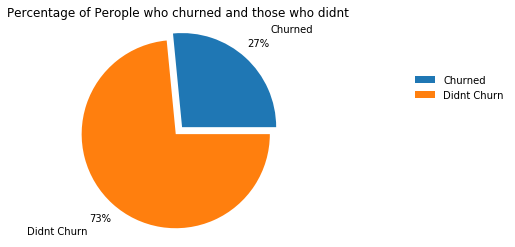

In [8]:
churned = data_clean[data_clean['Churn_n']==1]
unchurned = data_clean[data_clean['Churn_n']==0]

fig, ax = plt.subplots()
labels = ['Churned','Didnt Churn']
percentages = [len(churned), len(unchurned)]
explode=(0.1,0)
ax.pie(percentages, explode=explode, labels=labels,  
        autopct='%1.0f%%', 
       shadow=False, startangle=0,   
       pctdistance=1.2,labeldistance=1.4)
ax.axis('equal')
ax.set_title("Percentage of Perople who churned and those who didnt")
ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

<h4> Percentage of Churned </h4>
<blockquote>  We can notice that in our dataset we have more people who have not churned than those who did churn. This may be caused by the way the data was collected. The split is 27 and 73 percent respectively . We will be looking at other influences of the other columns to see if they had a effect on the likeliness of churning or not .

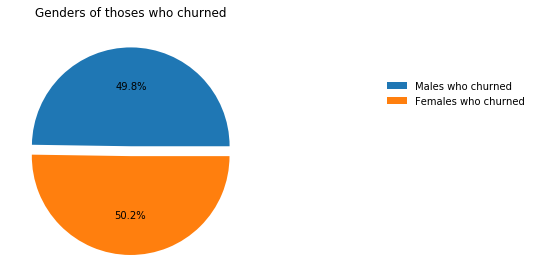

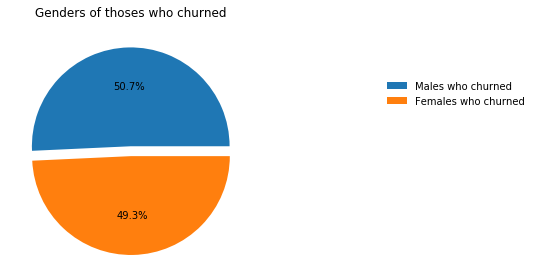

In [9]:
plt.figure(figsize=(10,10))
plt.subplot(2, 2, 4)
y = len(churned[churned.Gender_n == 1]) / len(churned) * 100
z = len(churned[churned.Gender_n == 0]) / len(churned) * 100
plt.title('Genders of thoses who churned')
plt.pie([y, z], explode=(0,0.1),autopct='%1.1f%%')
plt.legend(['Males who churned', 'Females who churned'], frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

plt.figure(figsize=(10,10))
plt.subplot(2, 2, 3)
y = len(unchurned[unchurned.Gender_n == 1]) / len(unchurned) * 100
z = len(unchurned[unchurned.Gender_n == 0]) / len(unchurned) * 100
plt.title('Genders of thoses who churned')
plt.pie([y, z], explode=(0,0.1),autopct='%1.1f%%')
plt.legend(['Males who churned', 'Females who churned'],frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

<h4> Gender</h4>
<blockquote> As we look at gender in both the ones who churned and those who ddidnt see can see a almost eqiual distribution meaning gender isnt really a good feature to see the likeliness of someones probability to churn . This occurs in the churned and not yet churned graph . If one were to base a model on this it would be inaccurate . This is an artifact.

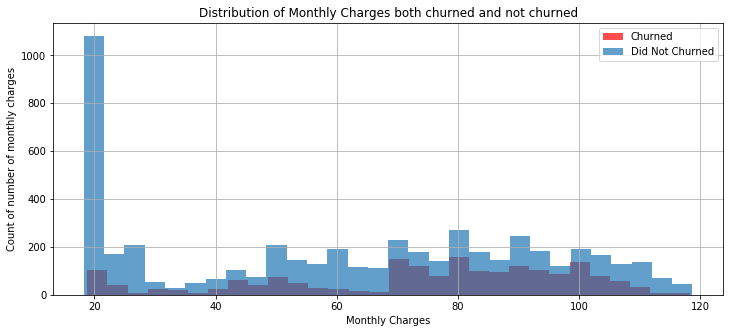

Mean of those who churned 74.4413322632423
Mean of those who didnt churn 61.2651236953999


In [10]:
churned_MonthCharge = data_clean[data_clean['Churn_n']==1]['MonthlyCharges']
unchurned_MonthCharge = data_clean[data_clean['Churn_n']==0]['MonthlyCharges']

fig = plt.figure(figsize=[12,5])
plt.title('Distribution of Monthly Charges both churned and not churned')
churned_MonthCharge.hist(alpha=0.7, bins=30,label='Churned',color='red')
unchurned_MonthCharge.hist(alpha=0.7, bins=30,label='Did Not Churned')
plt.legend(loc='upper right')
plt.ylabel('Count of number of monthly charges')
plt.xlabel('Monthly Charges')
plt.show()

print(f'Mean of those who churned {churned_MonthCharge.mean()}')
print(f'Mean of those who didnt churn {unchurned_MonthCharge.mean()}')

<h4> Monthly Charges</h4>
<blockquote>
When we look at the churned histogram in comparison to the did not churn we can see that most or majority of the data pays relatively low monthly charges in comparison to those who pay more . Most of the amount frequenting at round about 20 with a 1000+. Whereas with the people who did churn the large chunk of the data pays relatively more . From the 75 to 100 is where majority of the data resides. The mean also displays this at the mean of the unchurned is lower than the mean of those who churned . From this we can see that churing is related to how much one pays per month , we can almost say that the less ypu pay they less likely you are to churn . Which makes sense as most people want to save as money as possible and them churning means they found a cheap alternative . We love money and want to keep as much of it as possible .


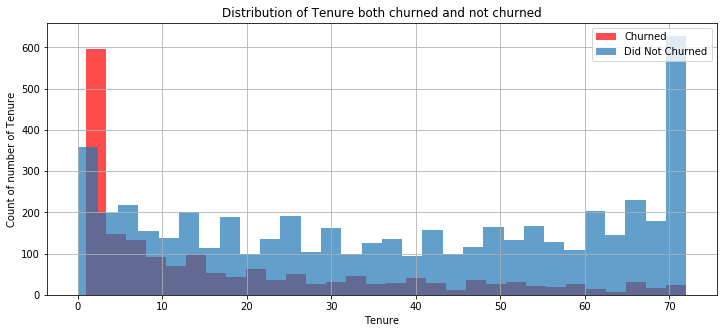

Mean of those who churned 17.979133226324237
Mean of those who didnt churn 37.56996521066873


In [11]:
churned_tenure = data_clean[data_clean['Churn_n']==1]['tenure']
unchurned_tenure = data_clean[data_clean['Churn_n']==0]['tenure']

fig = plt.figure(figsize=[12,5])
plt.title('Distribution of Tenure both churned and not churned')
churned_tenure.hist(alpha=0.7, bins=30,label='Churned',color='red')
unchurned_tenure.hist(alpha=0.7, bins=30,label='Did Not Churned')
plt.legend(loc='upper right')
plt.ylabel('Count of number of Tenure')
plt.xlabel('Tenure')
plt.show()

print(f'Mean of those who churned {churned_tenure.mean()}')
print(f'Mean of those who didnt churn {unchurned_tenure.mean()}')

<h4> Monthly Charges</h4>
<blockquote>
    We notice a trend in the tenure with regards to those that churned . The were more likely to churn the less time they were there. Which shows it has a very strong power to be seen as a major feature. In the real life its also explained as in thwe first few months of joining a cell company you can leave as there is a grace period for you to leave without a contract cancellation fee .

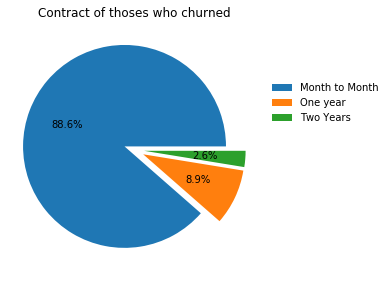

In [12]:
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
xx = len(churned[churned.Contract_n  == 0]) 
y = len(churned[churned.Contract_n  == 1]) 
z = len(churned[churned.Contract_n  == 2]) 
plt.title('Contract of thoses who churned')
plt.pie([xx ,y, z], explode=(0.1,0.1,0.1),autopct='%1.1f%%')
plt.legend(['Month to Month', 'One year','Two Years'],frameon=False, bbox_to_anchor=(1.5,0.8))
plt.show()

<h4> Contract</h4>
<blockquote>  If looking to see which of the contracts make up majority of churners we would go with month to month . The reason month to month subscribers are more likely to churn is the freedom month to month gives isnt not binding for several years. Corporations have set up that the longer contract has costly cancellation fee which may result in less churning . The release fee is high hence the 2 year people are the least our of the chart .  

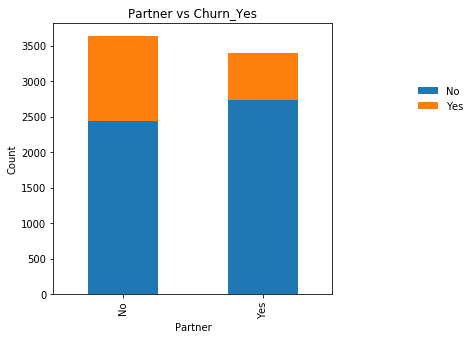

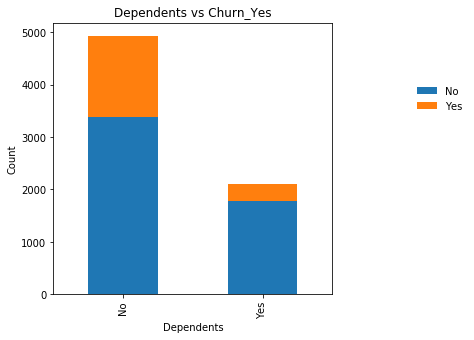

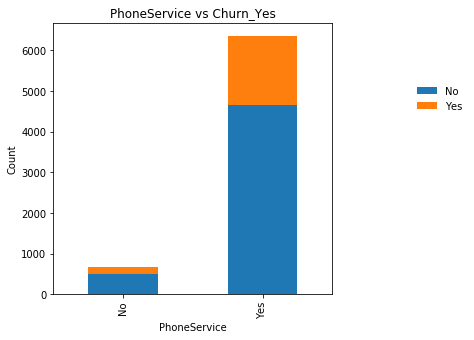

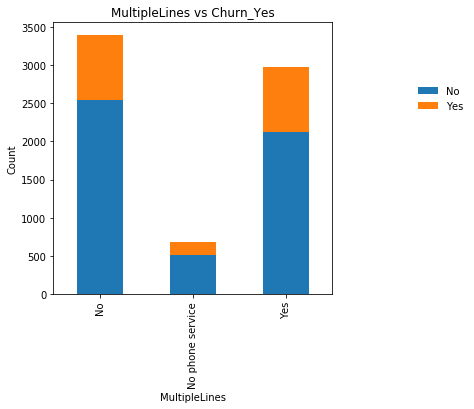

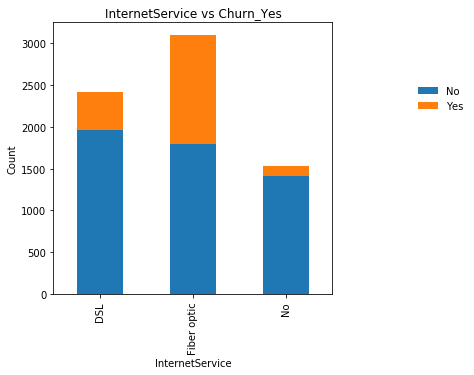

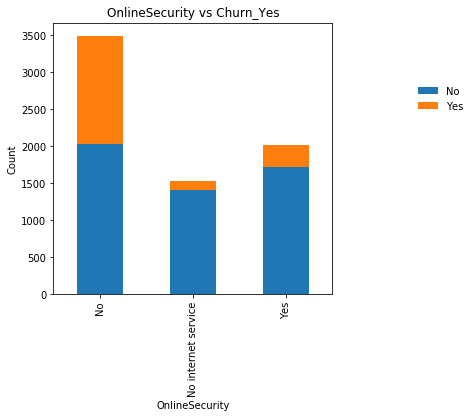

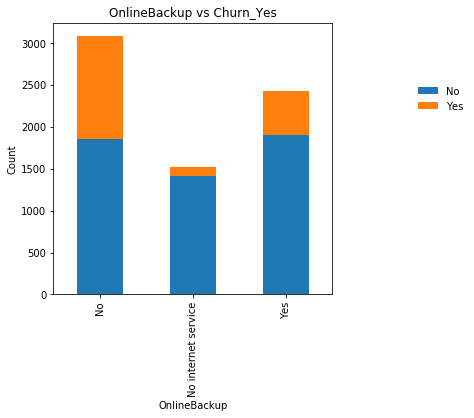

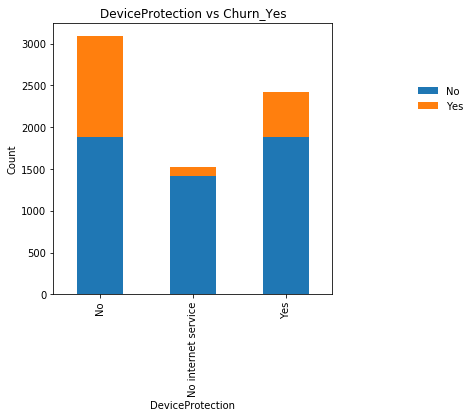

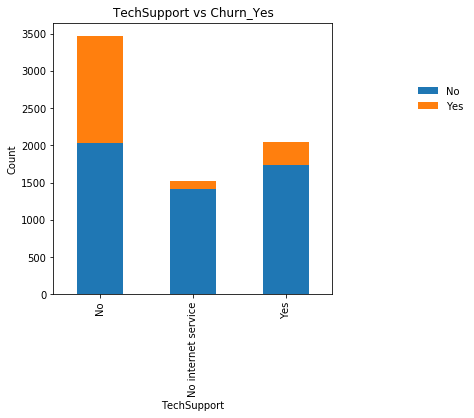

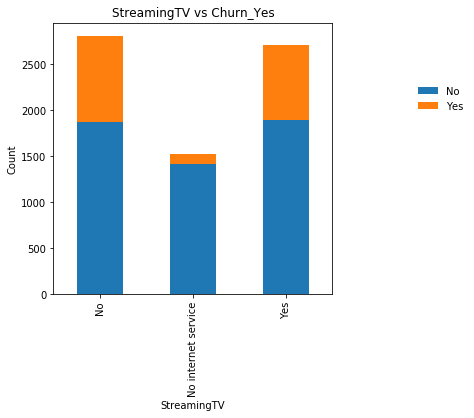

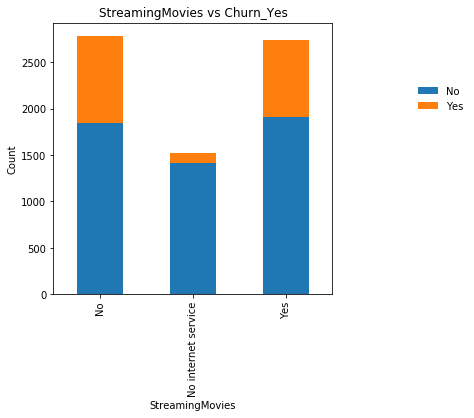

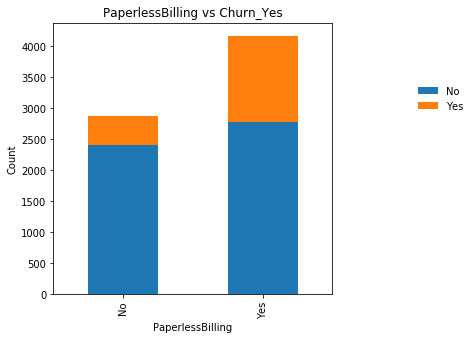

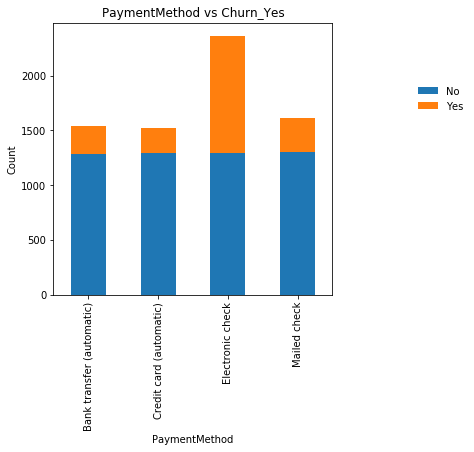

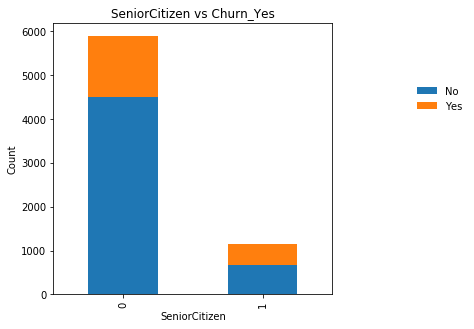

In [13]:
lst = [ 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'PaymentMethod','SeniorCitizen']

for i in lst:
    data.groupby([i, "Churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(5,5))
    plt.title('{} vs Churn_Yes'.format(i))
    plt.xlabel(f'{i}')
    plt.ylabel('Count')
    plt.legend(frameon=False,bbox_to_anchor=(1.5,0.8))
    plt.show()

<h5>Partner</h5>
<blockquote>
    As we can see that Partner isn’t really a good feature as we can see from the 
EDA the churn rate isnt giving us a good . There isnt a a trend thats usable .
</blockquote>
<h5>Dependents</h5>
<blockquote>
    As we can see that Dependents isn’t really a good feature as we can see from the 
EDA the churn rate isnt giving us a good . There isnt a a trend thats usable .
</blockquote>
<h5>PhoneService</h5>
<blockquote>
    As we can see that PhoneService isn’t really a good feature as we can see from the 
EDA the churn rate isnt giving us a good . There isnt a a trend thats usable .
</blockquote>
<h5>MultipleLines</h5>
<blockquote>
    As we can see that MultipleLines isn’t really a good feature as we can see from the 
EDA the churn rate isnt giving us a good . There isnt a a trend thats usable .
</blockquote>
<h5>DeviceProtection</h5>
<blockquote>
    As we can see that DeviceProtection isn’t really a good feature as we can see from the 
EDA the churn rate isnt giving us a good . There isnt a a trend thats usable .
</blockquote>
<h5>TechSupport</h5>
<blockquote>
    As we can see that TechSupport isn’t really a good feature as we can see from the 
EDA the churn rate isnt giving us a good . There isnt a a trend thats usable .
</blockquote>
<h5>StreamingTV</h5>
<blockquote>
    As we can see that StreamingTV isn’t really a good feature as we can see from the 
EDA the churn rate isnt giving us a good . There isnt a a trend thats usable .
</blockquote>
<h5>StreamingMovies</h5>
<blockquote>
    As we can see that StreamingMovies isn’t really a good feature as we can see from the 
EDA the churn rate isnt giving us a good . There isnt a a trend thats usable .
</blockquote>
<h5>PaperlessBilling</h5>
<blockquote>
    As we can see that PaperlessBilling isn’t really a good feature as we can see from the 
EDA the churn rate isnt giving us a good . There isnt a a trend thats usable .
</blockquote>


<h5>InternetService</h5>
<blockquote>
    People who use internet service of fibre optic are more likely to churn . This could be because 
fibre optic is the most expensive in comparison which could be a huge indicator of people 
churning as people want to save as much as possible .
</blockquote>

<h5>PaymentMethod</h5>
<blockquote>
    Those who used Electronic Check were more likely to churn as they needed to request
authorization from the customer which would require a a online form being signed
or a phone call which seems tedious nowadays as EFT has made that easier .
</blockquote>

<h5>Online Backup and Online Security</h5>
<blockquote>
   Those without Online Security and Online Backup were more likely to churn due to less hassles.
The admin of moving a service provider and your respective information that was kept
safe by the company is too much hence those who do have arent churning as much whereas those who dont are .
</blockquote>


## Observations so far:
- Our data is split with 70 percent non churn
- Our data has a 30 perecent churn
- Gender isnt a good feature 
- People who dont stream movies or have no internet are more likely to churn 
- People in month to month contracts are more likely to churn over one year ,and two year contracts 
- The lower the monthly charges the less likely to churn
- The Lower the tenure the more likely to churn
- Not having online backup and security mean the client is more likely to churn

## Split the data into training and test set 

In [14]:
x = data_clean.drop(['customerID','Churn_n','SeniorCitizen'],axis='columns')
y = data_clean['Churn_n']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 10) 

## Here we make our Model
- We use the DecisionTreeClassifier model
- We will fit it
- We predict using all of them using training and test data to see if they good at knowing trained data or new data
- Actual Decision Tree
- ROC Curve

In [15]:
tree = DecisionTreeClassifier(splitter='random')
tree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

## Predictions

In [16]:
y_pred = tree.predict(x_test)

In [17]:
print(f'Score of the classification model on training set = {tree.score(x_train, y_train)}')
print(f'Score of the classification model on test set = {tree.score(x_test, y_test)}')

Score of the classification model on training set = 0.997515086971956
Score of the classification model on test set = 0.7374024130589071


## Mean Absolute Error

In [18]:
from sklearn.metrics import mean_absolute_error
val_mae_class = mean_absolute_error(y_pred,y_test)
val_mae_class

0.262597586941093

## Classification Report 

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1066
           1       0.46      0.52      0.49       343

    accuracy                           0.74      1409
   macro avg       0.65      0.66      0.66      1409
weighted avg       0.75      0.74      0.74      1409



## Confusion Matrix 

In [20]:
print(confusion_matrix(y_test,y_pred))

[[861 205]
 [165 178]]


## ROC Curve Graph

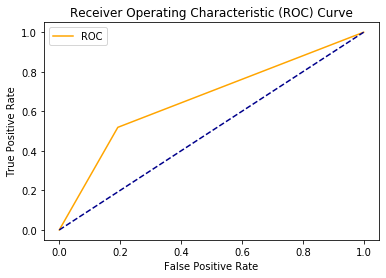

In [21]:
#predict_class_entropy_prob = class_tree_entropy.predict_proba(x_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Decision Tree

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.363134 to fit



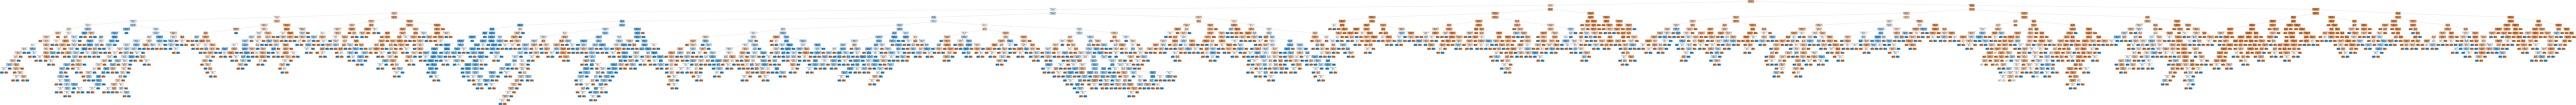

In [22]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, feature_names=x_train.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

# Pruning 
- we use the previous model and use feature importance to run the new model with the selected features

In [23]:
from sklearn.feature_selection import SelectFromModel
model = SelectFromModel(tree, prefit=True)
X_new = model.transform(x)
X_new.shape

(7043, 6)

In [24]:
dict = {'feature': x.columns, 'feature_importance':tree.feature_importances_}
new_df = pd.DataFrame(dict)
new_df.sort_values('feature_importance',axis=0,ascending=False,inplace=True)
new_df
features = [x for x in new_df['feature'].head(X_new.shape[1])]
features

['TotalCharges',
 'OnlineSecurity_n',
 'MonthlyCharges',
 'tenure',
 'Contract_n',
 'PaymentMethod_n']

##### These are the features that are the most prominate and will trim down to this  

In [25]:
x = data_clean[features]
y = data_clean['Churn_n']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 10) 

In [26]:
classic = DecisionTreeClassifier(max_depth=5,criterion='entropy',splitter='random',random_state=0)
classic.fit(x_train,y_train)
classic.score(x_test, y_test)

0.7636621717530163

## Predictions

In [27]:
y_predict = classic.predict(x_test)

In [28]:
print(f'Score of the classification model on training set = {classic.score(x_train, y_train)}')
print(f'Score of the classification model on test set = {classic.score(x_test, y_test)}')

Score of the classification model on training set = 0.774582889598864
Score of the classification model on test set = 0.7636621717530163


## Mean Absolute Error

In [29]:
from sklearn.metrics import mean_absolute_error
val_mae_class = mean_absolute_error(y_predict,y_test)
val_mae_class

0.23633782824698368

## Classification Report 

In [30]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1066
           1       0.51      0.54      0.53       343

    accuracy                           0.76      1409
   macro avg       0.68      0.69      0.68      1409
weighted avg       0.77      0.76      0.77      1409



## Confusion Matrix 

In [31]:
print(confusion_matrix(y_test,y_predict))

[[891 175]
 [158 185]]


## ROC Curve Graph

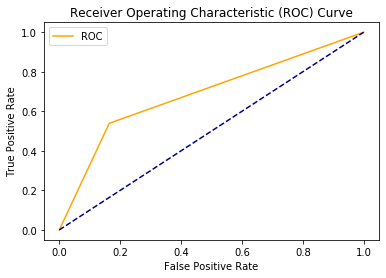

In [32]:
#predict_class_entropy_prob = class_tree_entropy.predict_proba(x_test)


fpr, tpr, thresholds = roc_curve(y_test, y_predict)
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## Decision Tree

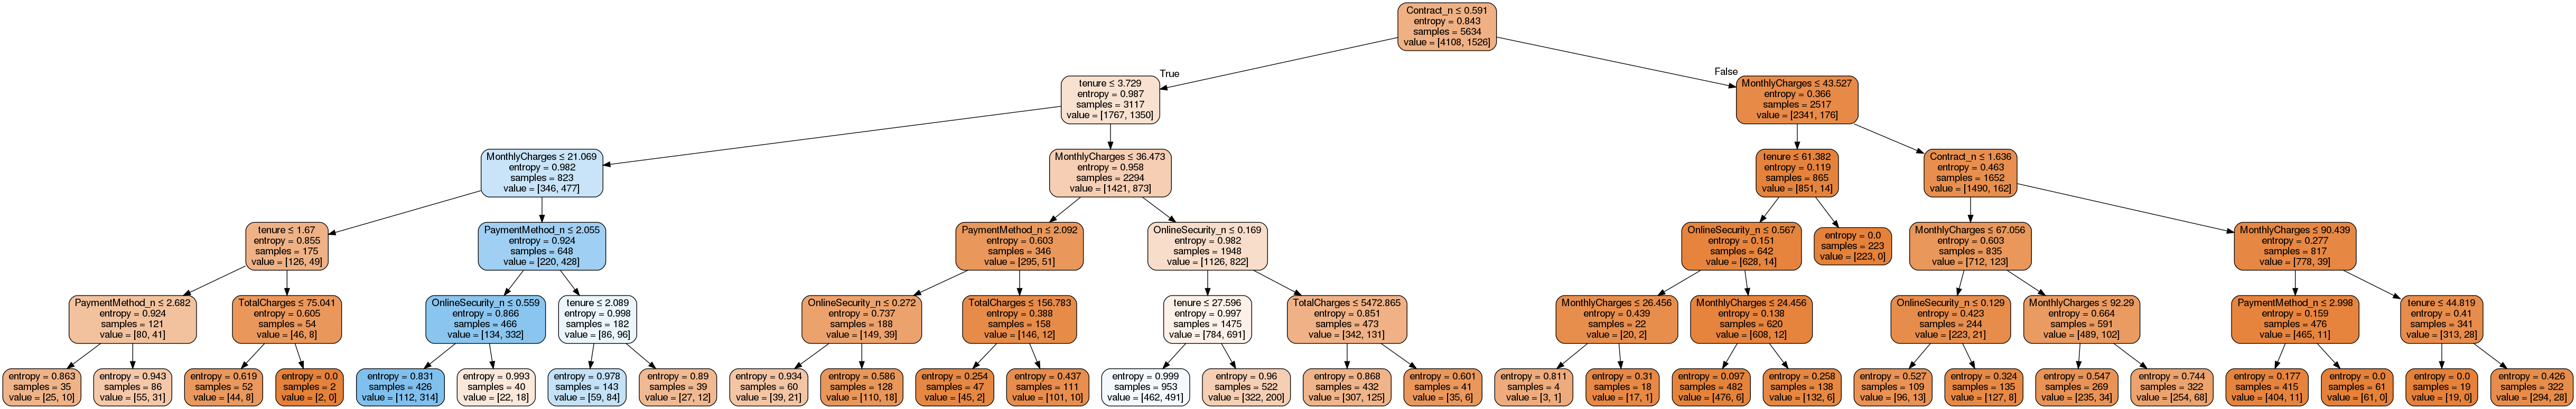

In [33]:
dot_data = StringIO()
export_graphviz(classic, out_file=dot_data, feature_names=x_train.columns,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())